In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

"""
List with ~100 episodes

Each episode has
'initial_configurations', 'final_configurations', 'action'


initial/final configurations has
'net_position', 'individual_net_position', 'cash_position', 'debts'

"""

configurations = np.load('./evaluation-data.npy',allow_pickle=True)

In [2]:
initial_cash_positions = []
ending_cash_positions = []

initial_individual_net_position = []
ending_individual_net_position = []

for episode in configurations:
    initial_cash_positions.append(episode['initial_configurations']['cash_position'])
    ending_cash_positions.append(episode['final_configurations']['cash_position'])
    
    initial_individual_net_position.append(episode['initial_configurations']['individual_net_position'])
    ending_individual_net_position.append(episode['final_configurations']['individual_net_position'])

In [3]:
max_initial_cash_positions = [np.max(cash_position) for cash_position in initial_cash_positions]
max_ending_cash_positions = [np.max(cash_position) for cash_position in ending_cash_positions]
max_initial_individual_net_position = [np.max(individual_net_position) for individual_net_position in initial_individual_net_position]
max_ending_individual_net_position = [np.max(individual_net_position) for individual_net_position in ending_individual_net_position]

In [4]:
def plot_histogram(parameters):
    plot = plt.hist(parameters['data'])
    plt.xlabel(parameters['xlabel'])
    plt.ylabel(parameters['ylabel'])
    plt.title(parameters['title'])

## Maximum beginning cash positions

Below displays the highest cash position after system initialization.

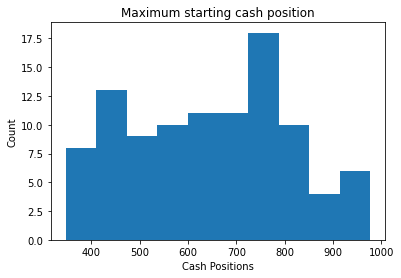

In [5]:
parameters= {'data':max_initial_cash_positions,
            'xlabel':"Cash Positions",
            'ylabel':"Count",
            'title':"Maximum starting cash position"}
plot_histogram(parameters)

## Maximum ending cash positions

Below displays the highest cash position after agent action and clearing.  
Note that as such, this will be the same as the final net position.

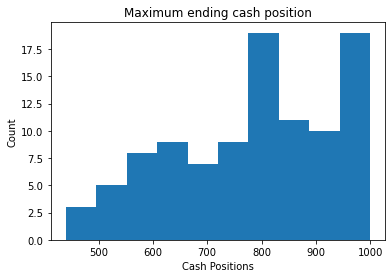

In [6]:
parameters= {'data':max_ending_cash_positions,
            'xlabel':"Cash Positions",
            'ylabel':"Count",
            'title':"Maximum ending cash position"}
plot_histogram(parameters)

## Maximum initial individual net positions

Below displays the highest net position given a system initialization.
Note that the positions are more evenly distributed than after agent allocation and clearing.

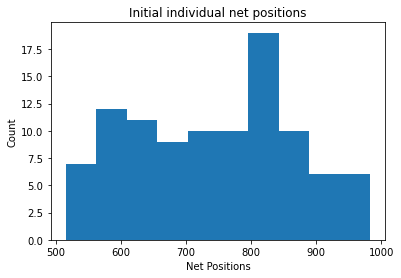

In [7]:
parameters= {'data':max_initial_individual_net_position,
            'xlabel':"Net Positions",
            'ylabel':"Count",
            'title':"Initial individual net positions"}
plot_histogram(parameters)

# Maximum ending individual net positions

Below displays the highest net position obtained by any bank after every agent has decided how to allocate its net position and after applying the clearing mechanism.

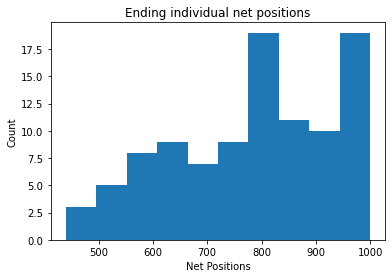

In [34]:
parameters= {'data':max_ending_individual_net_position,
            'xlabel':"Net Positions",
            'ylabel':"Count",
            'title':"Ending individual net positions"}
plot_histogram(parameters)

In [9]:
# Change in net positions

## Are there cases where one bank ends up with more than 60% of the system's wealth?

After allowing each agent to take an action and applying the clearing mechanism, we note that under the individual incentive scheme, the wealth of the agent typically gets consolidated into one agent's account.  

As such, while the net worth of the system may remain relative high and has increased over time, it may not lead to desirable system characteristics (i.e. fairness, consumer value, etc).



In [19]:
ending_cash_positions = pd.DataFrame(ending_cash_positions)

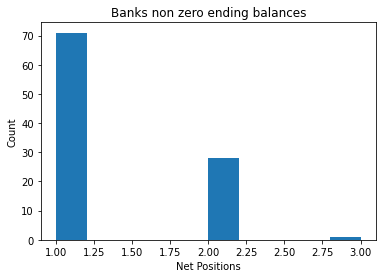

In [33]:
banks_with_non_zero_ending_balances = 3 - ending_cash_positions.isin([0]).sum(axis=1)
parameters= {'data':banks_with_non_zero_ending_balances,
            'xlabel':"Net Positions",
            'ylabel':"Count",
            'title':"Banks non zero ending balances"}
plot_histogram(parameters)